In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#criando nosso data frame
df = pd.read_excel("C:/Users/jessica/Desktop/analise de dados com python e pandas/datasets/AdventureWorks.xlsx")

In [3]:
#visualizar as 5 primeiras linhas
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
#quantidade de linhas e colunas
df.shape

(904, 16)

In [5]:
#verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
#qual a receita total
df["Valor Venda"].sum()

5984606.1426

In [7]:
#qual custo total
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #criando a coluna do custo

In [8]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [9]:
#qual custo total
round(df["custo"].sum(), 2)

2486783.05

In [10]:
#agora que temos a receita e custos total, podemos achar lucro total
df["lucro"] = df["Valor Venda"] = df["custo"]

In [11]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,2091.48,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48


In [12]:
#total lucro
round(df["lucro"].sum(), 2)

2486783.05

In [13]:
#criando coluna com total de dias para enviar produto
df["Tempo_envio"] = df["Data Envio"] = df["Data Venda"]

In [14]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-09,199,384,18839,200805093CS607,348.58,758.0,6,0.0,2091.48,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48,2008-05-09


In [15]:
#extraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-09,199,384,18839,200805093CS607,348.58,758.0,6,0.0,2091.48,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48,0


In [17]:
#verifica o tipo de coluna tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [18]:
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    0
Contoso            0
Fabrikam           0
Name: Tempo_envio, dtype: int64

In [19]:
#verificando se temos dados faltantes
df.isnull().sum()


Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [20]:
#vamos agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    316510.64
            Contoso             74481.97
            Fabrikam           876537.33
2009        Adventure Works    428056.24
            Contoso            181239.63
            Fabrikam           609957.24
Name: lucro, dtype: float64

In [21]:
#resetando index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,316510.64
1,2008,Contoso,74481.97
2,2008,Fabrikam,876537.33
3,2009,Adventure Works,428056.24
4,2009,Contoso,181239.63
5,2009,Fabrikam,609957.24


In [22]:
#qual total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

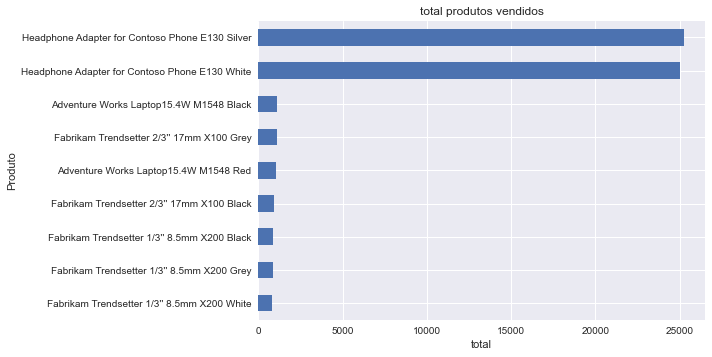

In [23]:
#grafico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="total produtos vendidos")
plt.xlabel("total")
plt.ylabel("Produto");


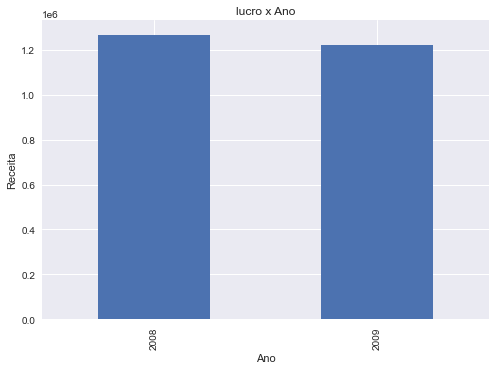

In [28]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [27]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008    1267529.94
2009    1219253.11
Name: lucro, dtype: float64

In [29]:
#seleciona apenas a venda de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [30]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-02,199,384,18938,200905023CS847,348.58,758.0,6,0.0,2091.48,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48,0
12,2009-05-16,2009-05-16,306,384,19067,200905163CS746,348.58,758.0,6,0.0,2091.48,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48,0
13,2009-05-31,2009-05-31,306,384,19068,200905313CS748,348.58,758.0,6,0.0,2091.48,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48,0
14,2009-06-28,2009-06-28,199,384,18959,200906283CS870,348.58,758.0,6,0.0,2091.48,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48,0
15,2009-07-08,2009-07-08,306,384,19070,200907083CS757,348.58,758.0,6,0.0,2091.48,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2091.48,0


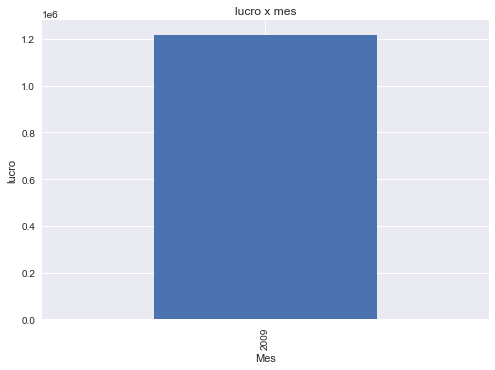

In [31]:
df_2009.groupby(df_2009["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="lucro x mes")
plt.xlabel("Mes")
plt.ylabel("lucro");

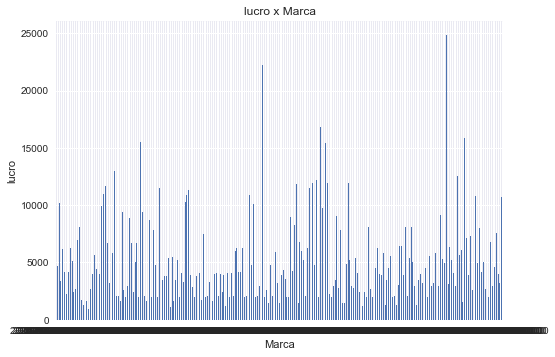

In [32]:
df_2009.groupby("Data Venda")["lucro"].sum().plot.bar(title="lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("lucro");
plt.xticks(rotation='horizontal');

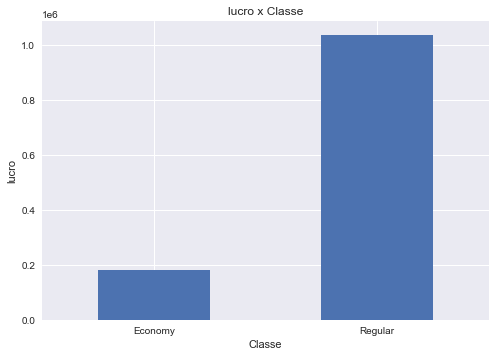

In [33]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("lucro");
plt.xticks(rotation='horizontal');

In [34]:
df["Tempo_envio"].describe()

count    904.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Tempo_envio, dtype: float64

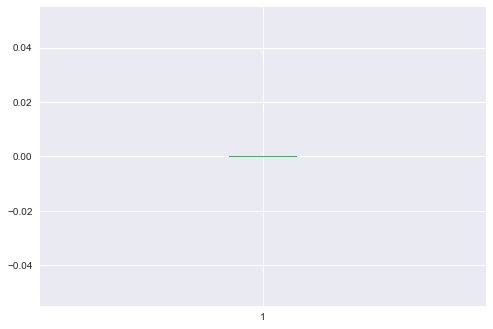

In [35]:
#grafico de bosplot
plt.boxplot(df["Tempo_envio"]);

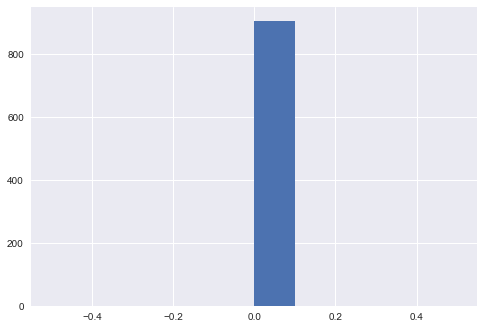

In [36]:
#histograma
plt.hist(df["Tempo_envio"]);

In [37]:
#tempo minimo de envio
df["Tempo_envio"].min()

0

In [38]:
#tempo maximo de nevio
df["Tempo_envio"].max()

0

In [40]:
#identidade outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio


In [41]:
#salvar 
df.to_csv("df_vendas_novo_csv", index=False)